<a href="https://colab.research.google.com/github/Madhusti-D/ML-CS-5783/blob/main/Assignment_1_Problem_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Assignment 1 Problem 2**

#**Housing Price Prediction Model**

##1. Implemention of linear regression model for all features in the dataset

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import random

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
input_features = pd.read_csv('/content/drive/MyDrive/CS5783 Assignment/Assignment 1/Assignment1_Q2_Data.csv')
#print(input_features)
#print(input_features.describe())
print(len(input_features))
All_features = input_features.drop(['House ID'], axis=1)


28


In [ ]:
#Separating trainable X features and trainable Y target 
Train_features_data = All_features.values
Y_train_dataset = Train_features_data[:28, -1].reshape(28,1)
X_train_dataset = Train_features_data[:28, :-1]

In [ ]:
#Creating test dataset
test_features_data = All_features.values
Y_test_dataset = test_features_data[14:,-1].reshape(14,1)
X_test_dataset = test_features_data[14:,:-1]

In [ ]:
#Shape of the dataset
print("Shape of X_train_dataset:", X_train_dataset.shape)
print("Shape of Y_train_dataset:", Y_train_dataset.shape)
print("Shape of X_test_dataset:", X_test_dataset.shape)
print("Shape of Y_test_dataset:", Y_test_dataset.shape)

Shape of X_train_dataset: (28, 11)
Shape of Y_train_dataset: (28, 1)
Shape of X_test_dataset: (14, 11)
Shape of Y_test_dataset: (14, 1)


In [ ]:
#Adding ones in the place of X0 for performing correct matrix multiplication

#X_train_dataset = np.vstack((np.ones((X_train_dataset.shape[0],)), X_train_dataset.T)).T

In [ ]:
def linear_reg(X_train_dataset,Y_train_dataset, learning_rate, iteration):
  m = Y_train_dataset.size
  param=np.zeros((X_train_dataset.shape[1],1))
  partial_diff_param =0.0
  
  cost_list = []

  for i in range(iteration):
    target_pred = np.dot(X_train_dataset, param)

    J_cost = (1/(2*m))*np.sum(np.square(target_pred - Y_train_dataset))

    partial_diff_param = (1/m)*np.dot(X_train_dataset.T, target_pred - Y_train_dataset)

#parameter or theta or weight update function
    param = param - (learning_rate*partial_diff_param)

    cost_list.append(J_cost)

#printing cost values for 10 times
    if (i%(iteration/10)==0):
      print("cost is :",J_cost)
  return param, cost_list, target_pred

In [ ]:
# Performing linear regression
iteration =20000
learning_rate = 0.0001
parameter,cost_list, target_pred = linear_reg(X_train_dataset, Y_train_dataset, learning_rate=learning_rate, iteration = iteration)

cost is : 824.6121428571428
cost is : 12.31733429512625
cost is : 11.191829173042509
cost is : 10.667473979084988
cost is : 10.357902499842835
cost is : 10.133233521301097
cost is : 9.948273360044155
cost is : 9.78615341022068
cost is : 9.639737284200528
cost is : 9.505419597852399


<function matplotlib.pyplot.show(*args, **kw)>

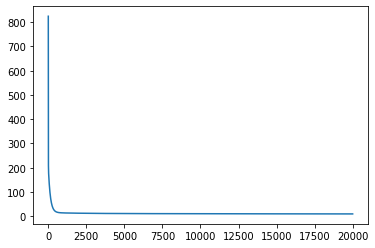

In [ ]:
plt_rng = np.arange(0, iteration)
plt.plot(plt_rng, cost_list)
plt.show

In [ ]:
least_mean_error = (1/X_train_dataset.shape[0])*np.sum(np.abs(target_pred-Y_train_dataset))

#Question 2.1

#Least Mean Square Error Result is printed here

In [ ]:
print("Least mean square prediction error is :", least_mean_error)
Average_Least_Square_error = np.average(cost_list)
print("Average Least squares error", Average_Least_Square_error)

Least mean square prediction error is : 3.527084056233735
Average Least squares error 11.909080410367613


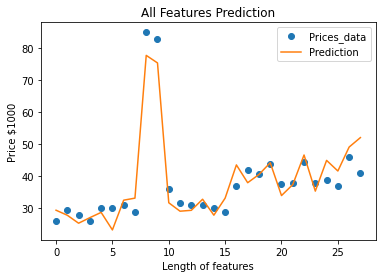

In [ ]:
plt.figure()
plt.plot(range(len(X_train_dataset)),Y_train_dataset, "o", label= "Prices_data")
plt.plot(range(len(target_pred)), target_pred, label="Prediction")
plt.xlabel("Length of features")
plt.ylabel('Price $1000')
plt.title("All Features Prediction")
plt.legend(loc="upper right")
plt.savefig('All_Features_Prediction.png')

#Build a Linear Regression model functions

From the .csv file it could be interpreted that there are many features of the input which are going to impact the prediction differenlty. Hence we need to know which are the most important features resulting for the major changes.

To acheive this, 
- First visualize each feature against price
- Then try to drop few features in linear regression and see which has its error very less than the least mean square error from over all error found in the previous step
-Visulaize the outputs.
 

# Question 2.2 

Expected Results for Q 2.2
1. Which feature has the most effect on the final value? 
   
   From the output plots, it can be interpreted that local price feature has more impact on the final value than any other features. 

2. How to implement it?
   
   This can be achieved by training and predicting each feature by feature and interpret the results
3. Can only this feature is enough to predict the price? 
   
   Only one feature which has more impact on the price cannot be used alone to  predict the price as it might provide underfitting results of prediction.
   It is always preferred to have little more features added in prediction process to handle any non-linearity






In [ ]:
# Train each feature by feature and calculate LMS error for each feature
All_ip_features = All_features.drop(['Price (1000$)'], axis = 1)
feature_row,feature_idx = All_ip_features.shape
All_ip_features.head()

List_of_features = ['Local Price', 'Bathrooms', 'Land Area', 'Living Area', '# Garages',\
                    '# Rooms', '# Bedrooms', 'Age of home', 'Construction type', 'Architecture type', '# Fire places']



Local Price
cost is : 824.6121428571428
cost is : 16.98500652668137
cost is : 16.985006504257804
cost is : 16.9850065042578
cost is : 16.9850065042578
cost is : 16.9850065042578
cost is : 16.9850065042578
cost is : 16.9850065042578
cost is : 16.9850065042578
cost is : 16.9850065042578
Leat mean square prediction error for feature Local Price is : 3.98330727300912
Bathrooms
cost is : 824.6121428571428
cost is : 412.2427416563345
cost is : 209.66127300812354
cost is : 110.14067007259922
cost is : 61.24996711373231
cost is : 37.231816446370715
cost is : 25.432608691771268
cost is : 19.636104807508023
cost is : 16.78850198712456
cost is : 15.389582572152651
Leat mean square prediction error for feature Bathrooms is : 3.977245202843106
Land Area
cost is : 824.6121428571428
cost is : 64.0307076560531
cost is : 64.03070350769818
cost is : 64.03070350769815
cost is : 64.03070350769815
cost is : 64.03070350769815
cost is : 64.03070350769815
cost is : 64.03070350769815
cost is : 64.0307035076981

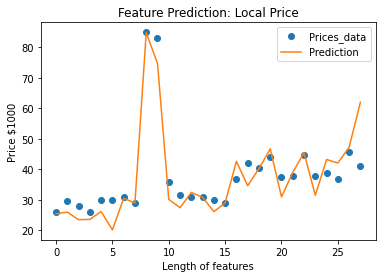

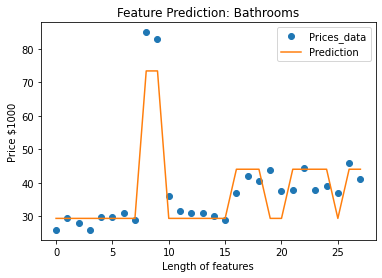

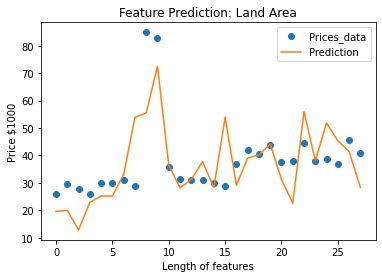

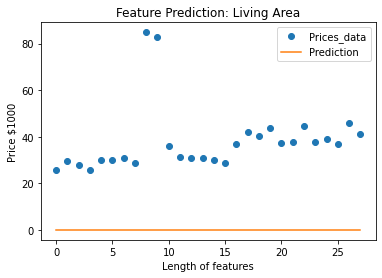

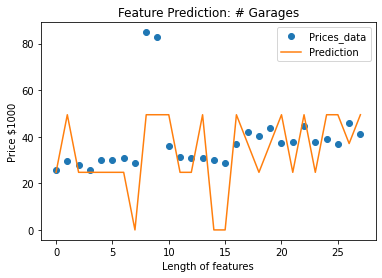

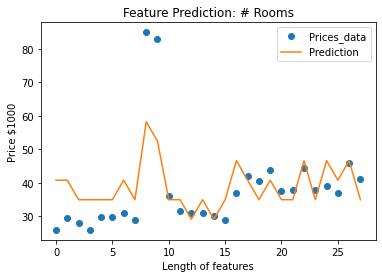

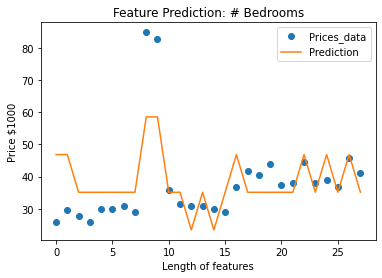

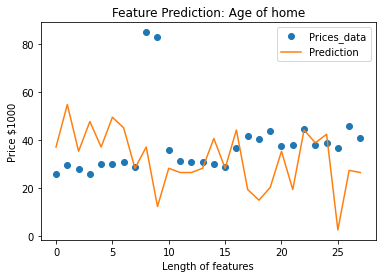

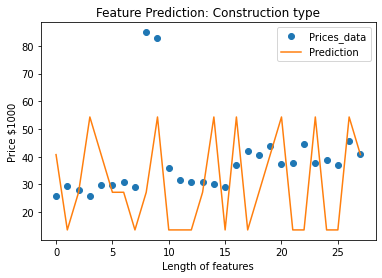

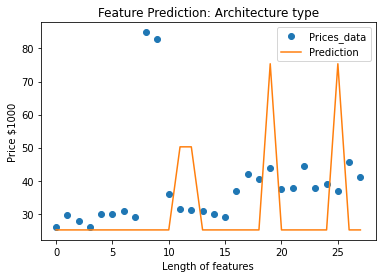

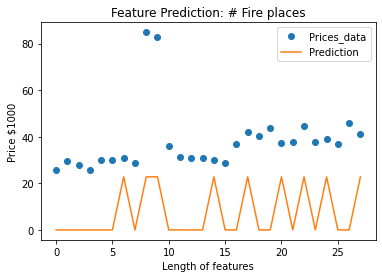

In [ ]:
least_mean_error_single_list = []
for i in List_of_features:
  single_feature = All_ip_features
  single_feature = All_ip_features.filter(like=i)


  print(i)
  each_feature_param, each_cost_list, each_target_pred = linear_reg(single_feature, Y_train_dataset, learning_rate=learning_rate, iteration = iteration)
  least_mean_error_single = (1/X_train_dataset.shape[0])*np.sum(np.abs(each_target_pred-Y_train_dataset)) 
  print("Leat mean square prediction error for feature",i,"is :", least_mean_error_single)

  plt.figure()
  plt.plot(range(len(single_feature)),Y_train_dataset, "o", label= "Prices_data")
  plt.plot(range(len(each_target_pred)), each_target_pred, label="Prediction")
  plt.xlabel('Length of features')
  plt.ylabel('Price $1000')
  plt.title("Feature Prediction: "+i)
  plt.legend(loc="upper right")
  plt.savefig("Feature Prediction "+i+".png")

  least_mean_error_single_list.append(least_mean_error_single)

# Question 2.3 

Expected Results for Q 2.3

Answers:

1. Which feature has the least effect on the final value? 
   
   From the result graph, it can interpreted that '#Fire Places ' is the least effect on the final values because when it is removed the prediction values plot is similar to the prediction values of all features. Hence, it has the least impact

2. How to implement it?
    
    From the previous section histogram, it can be interpreted that few features has very high least mean square errors. So by removing few of these features in different sets of feature list and analyse their performances   
   
3. How does removing this feature affect the performance? 

   Removing the least impact feature doesn't underfit the regression model. But, if the most impacting feature 'local price' is removed, the model becomes underfitting eventhough all other features are present.  


In [ ]:
All_ip_features = All_features.drop(['Price (1000$)'], axis = 1)
feature_row,feature_idx = All_ip_features.shape
All_ip_features.head()
                    

,Local Price,Bathrooms,Land Area,Living area,# Garages,# Rooms,# Bedrooms,Age of home,Construction type,Architecture type,# Fire places
0,4.9176,1.0,3.472,0.998,1.0,7,4,42,3,1,0
1,5.0208,1.0,3.531,1.500,2.0,7,4,62,1,1,0
2,4.5429,1.0,2.275,1.175,1.0,6,3,40,2,1,0
3,4.5573,1.0,4.050,1.232,1.0,6,3,54,4,1,0
4,5.0597,1.0,4.455,1.121,1.0,6,3,42,3,1,0


In [ ]:
#Creating Training datasets by removing few features.

LOCAL_PRICE        = input_features['Local Price'].values
BATHROOMS          = input_features['Bathrooms'].values
LAND_AREA          = input_features['Land Area'].values
LIVING_AREA        = input_features['Living area'].values
NO_OF_GARAGES      = input_features['# Garages'].values
NO_OF_ROOMS        = input_features['# Rooms'].values
NO_OF_BEDROOMS     = input_features['# Bedrooms'].values
AGE_OF_HOME        = input_features['Age of home'].values
CONSTRUCTION_TYPE  = input_features['Construction type'].values
ARCHITECTURE       = input_features['Architecture type'].values
FIRE_PLACES        = input_features['# Fire places'].values

learning_rate_new = 0.0001
iteration_new = 10000

In [ ]:
set_list_1 = input_features.drop(['House ID','Local Price', 'Price (1000$)'], axis=1)
set_list_1 = set_list_1.values
print("set_list_1", set_list_1.shape)

set_list_2 = input_features.drop(['House ID','Bathrooms', 'Price (1000$)'], axis=1)
set_list_2 = set_list_2.values
print("set_list_2", set_list_2.shape)

set_list_3 = input_features.drop(['House ID','Land Area', 'Price (1000$)'], axis=1)
set_list_3 = set_list_3.values
print("set_list_3", set_list_3.shape)

set_list_4 = input_features.drop(['House ID','Living area', 'Price (1000$)'], axis=1)
set_list_4 = set_list_4.values
print("set_list_4", set_list_4.shape)

set_list_5 = input_features.drop(['House ID','# Garages', 'Price (1000$)'], axis=1)
set_list_5 = set_list_5.values
print("set_list_5", set_list_5.shape)

set_list_6 = input_features.drop(['House ID','# Rooms', 'Price (1000$)'], axis=1)
set_list_6 = set_list_6.values
print("set_list_6", set_list_6.shape)

set_list_7 = input_features.drop(['House ID','# Bedrooms', 'Price (1000$)'], axis=1)
set_list_7 = set_list_7.values
print("set_list_7", set_list_7.shape)

set_list_8 = input_features.drop(['House ID','Age of home', 'Price (1000$)'], axis=1)
set_list_8 = set_list_8.values
print("set_list_8", set_list_8.shape)

set_list_9 = input_features.drop(['House ID','Construction type', 'Price (1000$)'], axis=1)
set_list_9 = set_list_9.values
print("set_list_9", set_list_9.shape)

set_list_10 = input_features.drop(['House ID','Architecture type', 'Price (1000$)'], axis=1)
set_list_10 = set_list_10.values
print("set_list_10", set_list_10.shape)

set_list_11 = input_features.drop(['House ID','# Fire places', 'Price (1000$)'], axis=1)
set_list_11 = set_list_11.values
print("set_list_11", set_list_11.shape)

set_list_1 (28, 10)
set_list_2 (28, 10)
set_list_3 (28, 10)
set_list_4 (28, 10)
set_list_5 (28, 10)
set_list_6 (28, 10)
set_list_7 (28, 10)
set_list_8 (28, 10)
set_list_9 (28, 10)
set_list_10 (28, 10)
set_list_11 (28, 10)


cost is : 824.6121428571428
cost is : 150.85762142539315
cost is : 108.31850445429521
cost is : 80.92972195282336
cost is : 63.25423536590064
cost is : 51.807324357940296
cost is : 44.35551705190827
cost is : 39.467272886266706
cost is : 36.22501423246917
cost is : 34.0405667600077


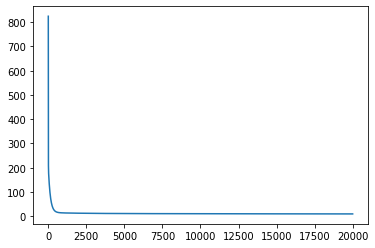

In [ ]:
parameter_list_1,cost_list_1, target_pred_1 = linear_reg(set_list_1, Y_train_dataset, learning_rate=learning_rate_new, iteration = iteration_new)

#Loss Plot
plt_rng = np.arange(0, iteration)
plt.plot(plt_rng, cost_list)
plt.show

least_mean_error_1 = (1/X_train_dataset.shape[0])*np.sum(np.abs(target_pred-Y_train_dataset))

In [ ]:
print("Least mean square prediction error is :", least_mean_error_1)

Least mean square prediction error is : 3.527084056233735


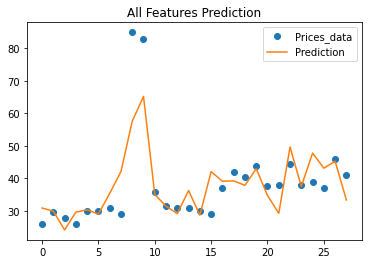

In [ ]:
plt.figure()
plt.plot(range(len(set_list_1)),Y_train_dataset, "o", label= "Prices_data")
plt.plot(range(len(target_pred_1)), target_pred_1, label="Prediction")
plt.title("All Features Prediction")
plt.legend(loc="upper right")
plt.savefig('All_Features_Prediction.png')

cost is : 824.6121428571428
cost is : 105.00858898209296
cost is : 57.461102500351465
cost is : 34.88397514507279
cost is : 24.115366220409054
cost is : 18.933443245750812
cost is : 16.396907479630656
cost is : 15.115171634677823
cost is : 14.430677845414163
cost is : 14.032381358246008
Least mean square prediction error is : 4.183766437780601


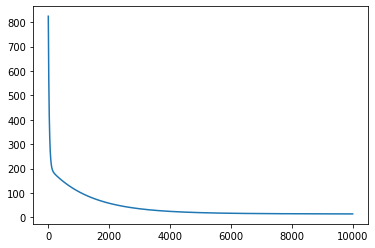

In [ ]:
parameter_list_2,cost_list_2, target_pred_2 = linear_reg(set_list_2, Y_train_dataset, learning_rate=learning_rate_new, iteration = iteration_new)

#Loss Plot
plt_rng = np.arange(0, iteration_new)
plt.plot(plt_rng, cost_list_2)
plt.show

least_mean_error = (1/X_train_dataset.shape[0])*np.sum(np.abs(target_pred_2-Y_train_dataset))
print("Least mean square prediction error is :", least_mean_error)

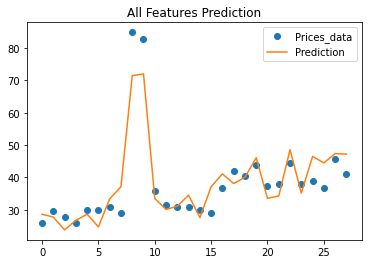

In [ ]:
plt.figure()
plt.plot(range(len(set_list_2)),Y_train_dataset, "o", label= "Prices_data")
plt.plot(range(len(target_pred_2)), target_pred_2, label="Prediction")
plt.title("All Features Prediction")
plt.legend(loc="upper right")
plt.savefig('All_Features_Prediction.png')

cost is : 824.6121428571428
cost is : 128.77306072982643
cost is : 79.77397938905784
cost is : 51.33414128618566
cost is : 34.823399158740756
cost is : 25.234315646108122
cost is : 19.661443956753214
cost is : 16.418966943969117
cost is : 14.528728339376865
cost is : 13.423175153409064
Least mean square prediction error is : 3.695069457956221


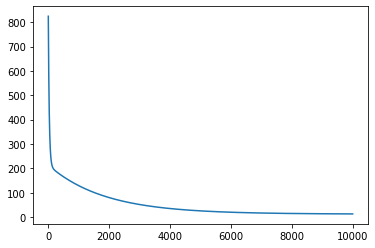

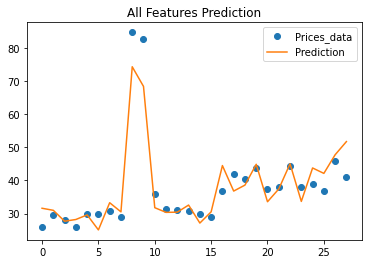

In [ ]:
parameter_list_3,cost_list_3, target_pred_3 = linear_reg(set_list_3, Y_train_dataset, learning_rate=learning_rate_new, iteration = iteration_new)

#Loss Plot
plt_rng = np.arange(0, iteration_new)
plt.plot(plt_rng, cost_list_3)
plt.show

least_mean_error = (1/X_train_dataset.shape[0])*np.sum(np.abs(target_pred_3-Y_train_dataset))
print("Least mean square prediction error is :", least_mean_error)

plt.figure()
plt.plot(range(len(set_list_3)),Y_train_dataset, "o", label= "Prices_data")
plt.plot(range(len(target_pred_3)), target_pred_3, label="Prediction")
plt.title("All Features Prediction")
plt.legend(loc="upper right")
plt.savefig('All_Features_Prediction.png')

cost is : 824.6121428571428
cost is : 105.45486326502738
cost is : 57.882910131192446
cost is : 35.2168402561749
cost is : 24.37070432278975
cost is : 19.136515232924236
cost is : 16.569069109576823
cost is : 15.27097551416477
cost is : 14.579109147012376
cost is : 14.178678003422293
Least mean square prediction error is : 4.200420117608705


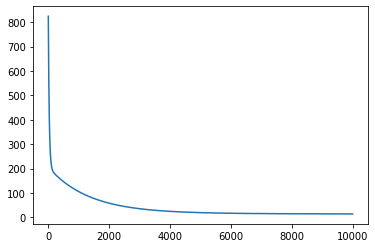

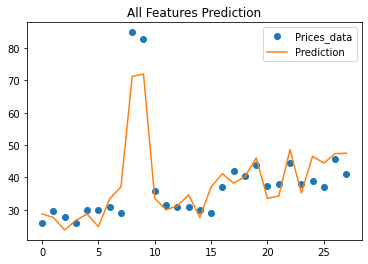

In [ ]:
parameter_list_4,cost_list_4, target_pred_4 = linear_reg(set_list_4, Y_train_dataset, learning_rate=learning_rate_new, iteration = iteration_new)

#Loss Plot
plt_rng = np.arange(0, iteration_new)
plt.plot(plt_rng, cost_list_4)
plt.show

least_mean_error = (1/X_train_dataset.shape[0])*np.sum(np.abs(target_pred_4-Y_train_dataset))
print("Least mean square prediction error is :", least_mean_error)

plt.figure()
plt.plot(range(len(set_list_4)),Y_train_dataset, "o", label= "Prices_data")
plt.plot(range(len(target_pred_4)), target_pred_4, label="Prediction")
plt.title("All Features Prediction")
plt.legend(loc="upper right")
plt.savefig('All_Features_Prediction.png')

cost is : 824.6121428571428
cost is : 104.82637472738786
cost is : 57.24047933611092
cost is : 34.662520759717054
cost is : 23.89986883533994
cost is : 18.722003694596992
cost is : 16.18628772323629
cost is : 14.9028049330908
cost is : 14.214927934707777
cost is : 13.812338713802134
Least mean square prediction error is : 4.140064673212581


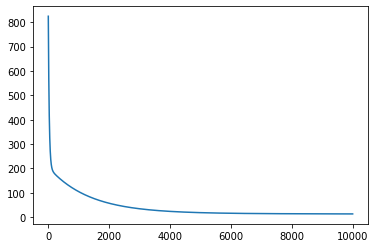

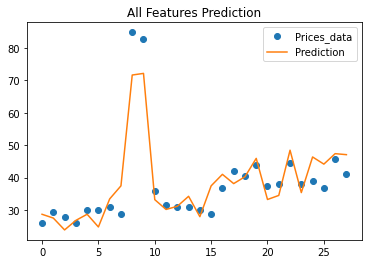

In [ ]:
parameter_list_5,cost_list_5, target_pred_5 = linear_reg(set_list_5, Y_train_dataset, learning_rate=learning_rate_new, iteration = iteration_new)

#Loss Plot
plt_rng = np.arange(0, iteration_new)
plt.plot(plt_rng, cost_list_5)
plt.show

least_mean_error = (1/X_train_dataset.shape[0])*np.sum(np.abs(target_pred_5-Y_train_dataset))
print("Least mean square prediction error is :", least_mean_error)

plt.figure()
plt.plot(range(len(set_list_3)),Y_train_dataset, "o", label= "Prices_data")
plt.plot(range(len(target_pred_5)), target_pred_5, label="Prediction")
plt.title("All Features Prediction")
plt.legend(loc="upper right")
plt.savefig('All_Features_Prediction.png')

cost is : 824.6121428571428
cost is : 116.73450827210247
cost is : 67.61677383758142
cost is : 42.04709333462112
cost is : 28.696333903640344
cost is : 21.68789335681388
cost is : 17.973375902205117
cost is : 15.971371263267791
cost is : 14.861397450107436
cost is : 14.217672743576165
Least mean square prediction error is : 4.162641627990989


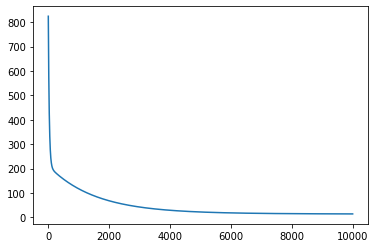

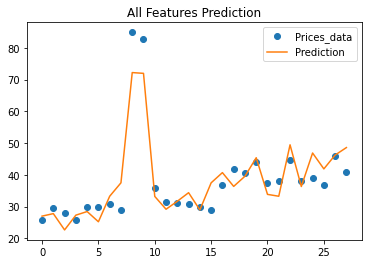

In [ ]:
parameter_list_6,cost_list_6, target_pred_6 = linear_reg(set_list_6, Y_train_dataset, learning_rate=learning_rate_new, iteration = iteration_new)

#Loss Plot
plt_rng = np.arange(0, iteration_new)
plt.plot(plt_rng, cost_list_6)
plt.show

least_mean_error = (1/X_train_dataset.shape[0])*np.sum(np.abs(target_pred_6-Y_train_dataset))
print("Least mean square prediction error is :", least_mean_error)

plt.figure()
plt.plot(range(len(set_list_3)),Y_train_dataset, "o", label= "Prices_data")
plt.plot(range(len(target_pred_6)), target_pred_6, label="Prediction")
plt.title("All Features Prediction")
plt.legend(loc="upper right")
plt.savefig('All_Features_Prediction.png')

cost is : 824.6121428571428
cost is : 107.0118272985303
cost is : 59.08323691155507
cost is : 35.95069068741489
cost is : 24.738235683647478
cost is : 19.258455691250386
cost is : 16.53791889293005
cost is : 15.147588381900933
cost is : 14.400551805635295
cost is : 13.966514433335188
Least mean square prediction error is : 4.176146257289543


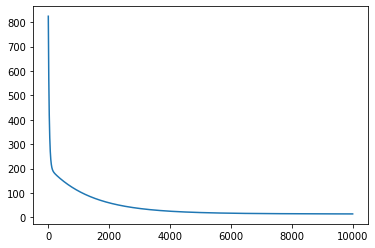

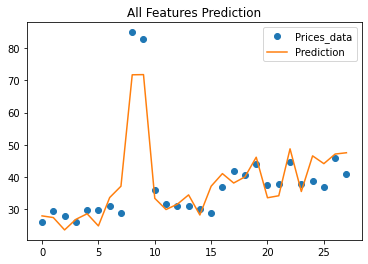

In [ ]:
parameter_list_7,cost_list_7, target_pred_7 = linear_reg(set_list_7, Y_train_dataset, learning_rate=learning_rate_new, iteration = iteration_new)

#Loss Plot
plt_rng = np.arange(0, iteration_new)
plt.plot(plt_rng, cost_list_7)
plt.show

least_mean_error = (1/X_train_dataset.shape[0])*np.sum(np.abs(target_pred_7-Y_train_dataset))
print("Least mean square prediction error is :", least_mean_error)

plt.figure()
plt.plot(range(len(set_list_3)),Y_train_dataset, "o", label= "Prices_data")
plt.plot(range(len(target_pred_7)), target_pred_7, label="Prediction")
plt.title("All Features Prediction")
plt.legend(loc="upper right")
plt.savefig('All_Features_Prediction.png')

cost is : 824.6121428571428
cost is : 42.39903006417904
cost is : 17.565597264233585
cost is : 16.515727659793395
cost is : 16.225190766459125
cost is : 15.970741997649162
cost is : 15.729074365039255
cost is : 15.498878501624386
cost is : 15.279564318387132
cost is : 15.07059174315024
Least mean square prediction error is : 4.13266620904353


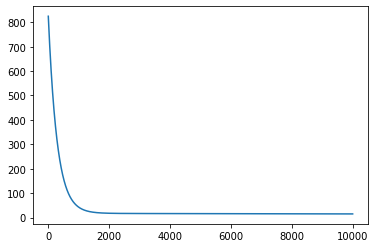

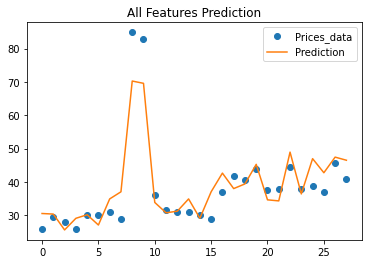

In [ ]:
parameter_list_8,cost_list_8, target_pred_8 = linear_reg(set_list_8, Y_train_dataset, learning_rate=learning_rate_new, iteration = iteration_new)

#Loss Plot
plt_rng = np.arange(0, iteration_new)
plt.plot(plt_rng, cost_list_8)
plt.show

least_mean_error = (1/X_train_dataset.shape[0])*np.sum(np.abs(target_pred_8-Y_train_dataset))
print("Least mean square prediction error is :", least_mean_error)

plt.figure()
plt.plot(range(len(set_list_3)),Y_train_dataset, "o", label= "Prices_data")
plt.plot(range(len(target_pred_8)), target_pred_8, label="Prediction")
plt.title("All Features Prediction")
plt.legend(loc="upper right")
plt.savefig('All_Features_Prediction.png')

cost is : 824.6121428571428
cost is : 105.09564039525281
cost is : 57.56013297348426
cost is : 35.026566425245846
cost is : 24.296532295164894
cost is : 19.141295203635494
cost is : 16.621206388412087
cost is : 15.348789255093148
cost is : 14.669067573399886
cost is : 14.27275173712355
Least mean square prediction error is : 4.161418771045582


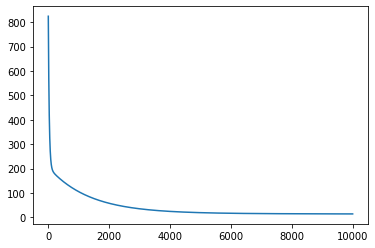

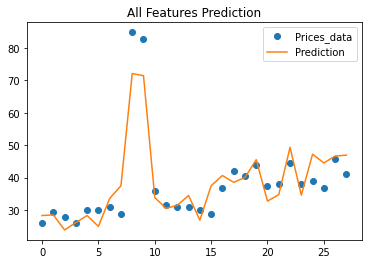

In [ ]:
parameter_list_9,cost_list_9, target_pred_9 = linear_reg(set_list_9, Y_train_dataset, learning_rate=learning_rate_new, iteration = iteration_new)

#Loss Plot
plt_rng = np.arange(0, iteration_new)
plt.plot(plt_rng, cost_list_9)
plt.show

least_mean_error = (1/X_train_dataset.shape[0])*np.sum(np.abs(target_pred_9-Y_train_dataset))
print("Least mean square prediction error is :", least_mean_error)

plt.figure()
plt.plot(range(len(set_list_3)),Y_train_dataset, "o", label= "Prices_data")
plt.plot(range(len(target_pred_9)), target_pred_9, label="Prediction")
plt.title("All Features Prediction")
plt.legend(loc="upper right")
plt.savefig('All_Features_Prediction.png')

cost is : 824.6121428571428
cost is : 104.54224701449093
cost is : 56.90732550064198
cost is : 34.331594560500335
cost is : 23.587338238511467
cost is : 18.431505570288717
cost is : 15.917455581303663
cost is : 14.654293486449925
cost is : 13.985367888294348
cost is : 13.600563825233287
Least mean square prediction error is : 4.124222990803062


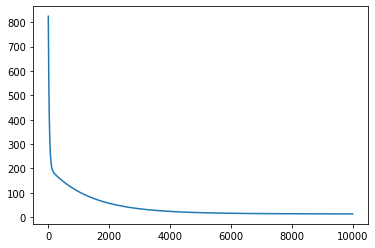

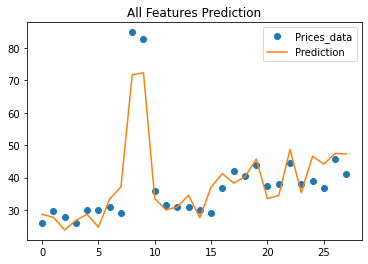

In [ ]:
parameter_list_10,cost_list_10, target_pred_10 = linear_reg(set_list_10, Y_train_dataset, learning_rate=learning_rate_new, iteration = iteration_new)

#Loss Plot
plt_rng = np.arange(0, iteration_new)
plt.plot(plt_rng, cost_list_10)
plt.show

least_mean_error = (1/X_train_dataset.shape[0])*np.sum(np.abs(target_pred_10-Y_train_dataset))
print("Least mean square prediction error is :", least_mean_error)

plt.figure()
plt.plot(range(len(set_list_3)),Y_train_dataset, "o", label= "Prices_data")
plt.plot(range(len(target_pred_10)), target_pred_10, label="Prediction")
plt.title("All Features Prediction")
plt.legend(loc="upper right")
plt.savefig('All_Features_Prediction.png')

cost is : 824.6121428571428
cost is : 104.23936375027188
cost is : 56.74199762867519
cost is : 34.32053495875899
cost is : 23.687684741886287
cost is : 18.59929330842942
cost is : 16.120888341293195
cost is : 14.873276075275891
cost is : 14.20812267818431
cost is : 13.82054795185445
Least mean square prediction error is : 4.144692010238854


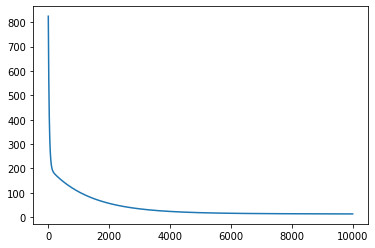

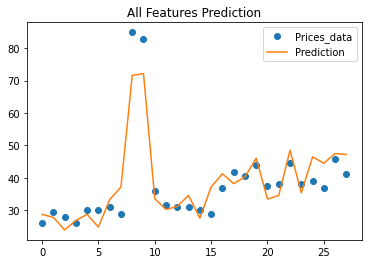

In [ ]:
parameter_list_11,cost_list_11, target_pred_11 = linear_reg(set_list_11, Y_train_dataset, learning_rate=learning_rate_new, iteration = iteration_new)

#Loss Plot
plt_rng = np.arange(0, iteration_new)
plt.plot(plt_rng, cost_list_11)
plt.show

least_mean_error = (1/X_train_dataset.shape[0])*np.sum(np.abs(target_pred_11-Y_train_dataset))
print("Least mean square prediction error is :", least_mean_error)

plt.figure()
plt.plot(range(len(set_list_3)),Y_train_dataset, "o", label= "Prices_data")
plt.plot(range(len(target_pred_11)), target_pred_11, label="Prediction")
plt.title("All Features Prediction")
plt.legend(loc="upper right")
plt.savefig('All_Features_Prediction.png')